In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np

pd.set_option('display.max_columns', None)

In [3]:

#Load tar.gz file into Python

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")
tn = tar.next()

#Extracting filename from TarInfo object
tn = tar.next()
tn.name

'hitdata7days/visitday=10/0017_part_00.parquet'

In [4]:
#Check if TarInfo is a file or a directory

print(tn.isreg())
print(tn.isdir())

True
False


In [5]:
#Reading info from parquet file

pq.read_schema(tn.name)

hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

In [6]:
#Read in parquet file as pandas DataFrame

df = pd.read_parquet(tn.name)

In [7]:
df.head()

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,18598956716,hit_data_fingerhutcomprod_2022-12-10.tsv,14603,FDM,2450573847312321896,394589978322276787,3,2022-12-10 00:08:42,2022-12-10,12,2022,12,50,1670652522,pe,"en-US,en;q=0.9","20599,111,112,127,129,145,155,171,182,10005,10...",U,172.58.8.3,10,None,no link_name,None,https://www.fingerhut.com/,index,None,None,None,None,None,None,None,index,None,None,None,None,None,None,None,https://www.fingerhut.com/,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FSApproved,None,None,None,None,71268c61620e4cf9b4b469d9b5b46b6e,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,0,0,None,None,None,None,None,1063982382,961,1873,Y,N,Y,2,4,300,t-mobile.com,9/11/2022 21:8

In [8]:
columns = ['checkoutthankyouflag','useragent','category','productlist','subcategory','searchterms']
columns
df5 = pd.read_parquet(tn.name,columns=columns)

In [9]:
df5

,checkoutthankyouflag,useragent,category,productlist,subcategory,searchterms
0,0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,None,None,None
1,0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,None,None,None,None
2,0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,index,None,index,None
3,0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,None,None,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,;NQ7JO;;;;eVar1=Bed & Bath|eVar2=Bed & Bath:Ba...,Bed & Bath:Bath:Bath Mats & Rugs,None
...,...,...,...,...,...,...
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,";NRC5J;1;83.99;;,;NRVI1;1;68.99;;,;NRVI1;1;68....",cart,None
124863,0,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A50...,None,None,None,None
124864,0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,mobile index,None,mobile index,None
124865,0,Mozilla/5.0 (Linux; Android 12; SM-A135U) Appl...,index,None,index,None


In [10]:
# b = pd.DataFrame(df5.productlist.str.split(',').tolist(), index=df5.checkoutthankyouflag).stack()
# b.head(20)
# b = b.to_frame(name="product")
# b
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

df5 = tidy_split(df5, 'productlist', sep=',')
df6 = tidy_split(df5, 'productlist', sep='|')
df6

,checkoutthankyouflag,useragent,category,productlist,subcategory,searchterms
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,;NQ7JO;;;;eVar1=Bed & Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,eVar2=Bed & Bath:Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,eVar3=Bed & Bath:Bath:Bath Mats & Rugs,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,eVar4=Bed & Bath:Bath:Bath Mats & Rugs,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,eVar53=https://www.fingerhut.com/search/Bed%20...,Bed & Bath:Bath:Bath Mats & Rugs,None
...,...,...,...,...,...,...
124857,0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like M...,None,eVar69=20.99,None,None
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,;NRC5J;1;83.99;;,cart,None
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,;NRVI1;1;68.99;;,cart,None
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,;NRVI1;1;68.99;;,cart,None


In [11]:
# #(?<=\[)(.*?)(?=\])
# # df6['newList'] = df6.productlist.str.split(':')[0]
# # df6
# df6['Version_short'] = df6['productlist'].str.extract('r"^.*[A-Za-z][A-Za-z][A-Za-z] & [A-Za-z0-9]+$"').fillna('')
# #df6['Version_long'] = dff['Version_short'].str.replace('V', 'Version ')
# df6

df6['productlist'] = np.where(df6['checkoutthankyouflag'] == 0, df6['category'], df6['productlist'])

In [12]:
df6[df6['checkoutthankyouflag'] == 1]

,checkoutthankyouflag,useragent,category,productlist,subcategory,searchterms
172,1,Mozilla/5.0 (Linux; Android 13; SM-N981U) Appl...,checkout:confirmation,Home,checkout:confirmation,None
172,1,Mozilla/5.0 (Linux; Android 13; SM-N981U) Appl...,checkout:confirmation,Home Appliances,checkout:confirmation,None
172,1,Mozilla/5.0 (Linux; Android 13; SM-N981U) Appl...,checkout:confirmation,Fireplaces & Accessories;NRQAU;1;595.99;;,checkout:confirmation,None
172,1,Mozilla/5.0 (Linux; Android 13; SM-N981U) Appl...,checkout:confirmation,Personal Care,checkout:confirmation,None
172,1,Mozilla/5.0 (Linux; Android 13; SM-N981U) Appl...,checkout:confirmation,Makeup,checkout:confirmation,None
...,...,...,...,...,...,...
124714,1,Mozilla/5.0 (Linux; Android 12; SM-G998U Build...,checkout:confirmation,Women's Clothing,checkout:confirmation,None
124714,1,Mozilla/5.0 (Linux; Android 12; SM-G998U Build...,checkout:confirmation,Intimates;NB36G;1;50.99;256=20.40;,checkout:confirmation,None
124714,1,Mozilla/5.0 (Linux; Android 12; SM-G998U Build...,checkout:confirmation,Sports & Outdoors,checkout:confirmation,None
124714,1,Mozilla/5.0 (Linux; Android 12; SM-G998U Build...,checkout:confirmation,Exercise & Fitness,checkout:confirmation,None


In [13]:
#delete strings after ";"
df6['productlist'] = df6['productlist'].str.split(';').str[0]
 # delete strings after "|"
df6['productlist'] = df6['productlist'].str.split('|').str[0]
# # delete strings after ":"
df6['productlist'] = df6['productlist'].str.split(':').str[0]

df6

,checkoutthankyouflag,useragent,category,productlist,subcategory,searchterms
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,Bed & Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,Bed & Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,Bed & Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,Bed & Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
4,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Bed & Bath:Bath,Bed & Bath,Bed & Bath:Bath:Bath Mats & Rugs,None
...,...,...,...,...,...,...
124857,0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like M...,None,None,None,None
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,cart,cart,None
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,cart,cart,None
124862,0,Mozilla/5.0 (Linux; Android 12; LM-V600) Apple...,cart,cart,cart,None


In [14]:
X=df6['productlist'] ## features
Y=df6['checkoutthankyouflag'] ## target

In [15]:
X = pd.get_dummies(df6['productlist'])
X

,,Crafts & Holidays,Crafts & Sewing,Dough & Modeling,Houses & Feeders,Keyboards & Styli,Loungers & Toys,Music & Books,Scanners & Fax,Trains & RC,Accent Chairs,Accessories,Action Figures,Action Figures & Playsets,Activewear,Activities & Toys,Air Mattresses,All Bracelets,All Earrings,All Necklaces & Pendants,All Rings,All TVs,All Watches,Amplifiers & Subwoofers,Apparel,Area Rugs,Art & Drawing Supplies,Arts,Athletic & Sneakers,Audio,Auto Care & Maintenance,Auto Exterior,Auto Interior,Auto Parts & Tools,Automotive,Baby,Baby Carriers,Baby Dolls,Baby Gear,Baby Grooming & First Aid,Bakeware,Barware,Bath,Bath & Body,Bath Mats & Rugs,Batteries,Bean Bag Chairs,Bed & Bat,Bed & Bath,Bed Pillows & Protectors,Bedding,Bedding Basics,Bedding Sets & Collections,Bedroom,Bikes,Bikes & Riding Toys,Bikes & Trikes,Binoculars,Binoculars & Optics,Bird Baths,Blankets & Throws,Blenders,Blinds & Treestands,Blocks & Building Sets,Bluetooth Portable Speakers,Boots,Bracelets,Bras,Briefcases & Laptop Bags,Building Sets & Kits,Camping & Hiking,Camping Furniture,Can Openers,Canisters & Countertop,Car Electronics,Car Organization,Car Stereos & Receivers,Cart_Interstitial,Casual,Cats,Cell Phones,Christmas,Classic Games & Tables,Clay,Clearance,Clocks,Closet,Clothing,Coats & Outerwear,Coffee,Collectible Toys,Comforters,Comforters & Duvet Inserts,Compressors & Air Tools,Computer Networking,Computers & Laptops,Cookware,Cookware Sets,Coveralls & Overalls,Craft Kits,Cutlery,DVD & Blu-ray Players,Daily Living & Health Aids,Dart Boards & Darts,Decor,Desks,Dining & Entertaining,Dining Sets & Collections,Dogs,Doll Clothes & Accessories,Dolls & Dollhouses,Drapes & Panels,Drawing & Coloring,Dress,Drills & Routers,Drinkware,Dutch Ovens & Casseroles,Duvet Covers,Earrings,Easels & Art Tables,Electric Grills & Griddles,Electric Skillets,Electronics,Entertainment & TV,Exercise & Fitness,Exercise Bikes,Face,Family & Personalized,Fashion Dolls,Featured Shops,Fine Jewelry,Fireplaces & Accessories,Fishing,Fitness,Flashlights & Lanterns,Floats,Foam & Specialty,Folding Tables & Chairs,Food Prep & Gadgets,Food Processors & Choppers,Fragrances,Fryers,Furniture,Furniture & Scratchers,Gadget Sets & Utensils,Game Room,Games & Puzzles,Gaming Chairs,Garage & Storage,Garden Statues & Accents,Garment Racks,Gifts,"Gifts, Crafts & Holidays",Girls' Clothing,Golf,Golf Bags,Golf Clubs,Graters & Slicers,Griddle & Grill Pans,Grill Tools & Accessories,Grills & Outdoor Cooking,Gun Storage & Accessories,Hair Accessories,Hair Care,Hair Dryers,Hand & Body Care,Hand Tools & Tool Sets,Handbags,Hangers,Headphones,Health & Safety,Health Care,Heaters,Helmets & Accessories,Holidays,Home,Home Appliances,Home Audio & Theater,Home Improvement,Home Office,Hosiery & Socks,Hoverboards,Humidifiers & Vaporizers,Hunting & Shooting,Hunting Apparel,Hunting Footwear,Indoor Decorations,Infant & Toddler Toys,Interior Accessories,Intimates,Jeans,Jewelry & Bead Kits,Jewelry & Watches,Jump Starts & Safety,Kids Workbenches & Tools,Kids' & Teen Bedding,Kids' Arts & Crafts,Kids' Bedding Sets & Collections,Kids' Comforters,Kids' Electronics,Kids' Room,Kids' Tables & Chairs,Kitchen,Kitchen & Dining,Kitchen Appliances,Kitchen Knives,Kitchen Linens,Kitchen Storage,Knives & Tools,Ladders & Step Stools,Laptop Desks,Laptops,Laundry,Lawn Games,Learning & STEM,Lights & String Lights,Living Room,Luggage & Travel Bags,Luggage Sets,Makeup,Makeup Tools & Accessories,Massage,Massage & Spa,Mattress Pads & Toppers,Men's Bikes,Men's Clothing,Men's Shoes,Men's Watches,Metal Detectors,Microwaves,Mini Fridges & Coolers,Miniature Dolls & Play Sets,Mixers,Mops,Movies,"Movies, Music & Books",Music,Music & Karaoke,Musical Instruments,Nails,Necklaces & Pendants,Nintendo Switch,Nursing & Feeding,Office,Office & Crafts,Office Chairs,Oral Care,Ornaments & Tree Decor,Outdoor Play,PC Gaming,PC Gaming Computers,PC Gaming Controllers,PC Gaming Hardware Accessories,PC Gaming Headsets,PC Gaming Mice & Mouse Pads,Painting,Painting Kits,Painting Supplies,Panties,Pa

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#using pca to reduce demionsion of x and y
import time
from sklearn.decomposition import PCA

pca = PCA(.85)
pca.fit(X_train)
Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)

In [ ]:
model=DecisionTreeClassifier() ## define 
#param={'criterion':['gini','entropy'],'max_depth':range(3,50)}
param={'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [3, 4, 5, 6, 7, 8, 9],
              'criterion' :['gini','entropy'],
               'splitter': ['best', 'random'],
             }
grid_search=GridSearchCV(model, param,cv=10,n_jobs=-1)
grid_search.fit(Xtrain_pca, y_train)
print (grid_search.best_score_, grid_search.best_params_)

In [18]:
# final_model=DecisionTreeClassifier()
# #final_model=DecisionTreeClassifier(**grid_search.best_params_)
# final_model.fit(Xtrain_pca, y_train)
# y_pred=final_model.predict(Xtest_pca)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

final_model=DecisionTreeClassifier()
#final_model=DecisionTreeClassifier(**grid_search.best_params_)
final_model.fit(X_train, y_train)
y_pred=final_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9906461325830495


In [19]:
test=pd.DataFrame(final_model.feature_importances_)
test['checkoutcategories']=X.columns

In [24]:
# test
# test.columns
test = test.rename(columns={0: 'rate'})
test = test.sort_values(by='rate', ascending=False)
test.head(20)

,rate,checkoutcategories
50,0.047448,Bedding
225,0.037099,Men's Clothing
370,0.027389,Women's Clothing
60,0.027365,Blankets & Throws
0,0.026761,
336,0.019596,Sweatshirts & Hoodies
204,0.018301,Kitchen Appliances
196,0.017657,Kids' Arts & Crafts
371,0.014395,Women's Shoes
214,0.013759,Learning & STEM


Text(0.5, 1.0, 'Top 20 categories while checking out for all devices')

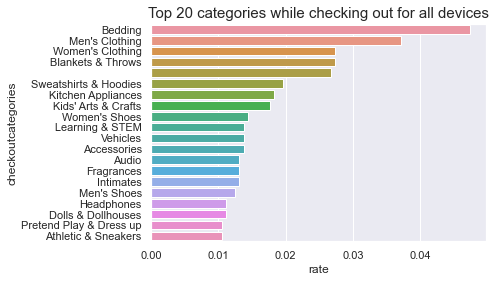

In [30]:
#sns.barplot(x='rate',y='check out categories',data=test,orient='h'
           #).set(title='categories while checking out for all devices')

sns.set()
ax = sns.barplot(x=test.rate[:20],y=test.checkoutcategories[:20],orient='h')

#plt.title('Sales Data', fontsize=20)
ax.axes.set_title('Top 20 categories while checking out for all devices',fontsize=15)
#ax.set(title = 'Top 20 categories while checking out for all devices', fontsize=20)
# sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x='rate',y='check out categories',data=test,orient='h').set(title='categories while checking out for all devices')

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)

confusion matrix: 
 [[39542     0]
 [  379   597]]


In [33]:
def plot_confusion_matrix(cm, title = "confusion matrix", cmap = "Pastel1"):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix', size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

<Figure size 432x288 with 0 Axes>

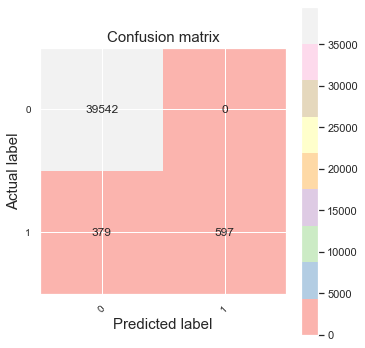

In [36]:
plt.figure()
plot_confusion_matrix(cm);
plt.show();